### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow
from funcs import auto_canny
from funcs import find_contours

In [5]:
# finding contours of simple objects in an image
shape_img, img_used, shape_img_contours, shape_img_hierarchy = find_contours(
    "./imgs/simple_shapes.png", black_obj_on_white_bg=True, mode=cv.RETR_EXTERNAL
)

## Contour Features ([Docs](https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html))

- ### Moment

An image moment is a certain particular weighted average (moment) of the image pixels' intensities, or a function of such moments. It is calculated similarly to how first moment of an area would be calculated. 

Simple properties of the image which are found via image moments include area (or total intensity), its centroid, and information about its orientation.

> The function `cv.moments(cnt)` gives a dictionary of all moment values calculated for that particular contour.

Out of all the values this function returns, three of the most important values are returned with the following keys -- 
1. 'm00': Area (for binary images) or sum of grey level (for greytone images)
2. 'm10': First moment of area about the x axis
3. 'm01': First moment of area about the y axis

These can be used to calculate the centroid of a contour as, (`cx= 'm10'/'m00'`, `cy= 'm01'/'m00'`).

In [6]:
moment_of_all_contours = {
    cnt_i: cv.moments(cnt) for cnt_i, cnt in enumerate(shape_img_contours)
}

In [7]:
moment_of_all_contours[0]

{'m00': 0.0,
 'm10': 0.0,
 'm01': 0.0,
 'm20': 0.0,
 'm11': 0.0,
 'm02': 0.0,
 'm30': 0.0,
 'm21': 0.0,
 'm12': 0.0,
 'm03': 0.0,
 'mu20': 0.0,
 'mu11': 0.0,
 'mu02': 0.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.0,
 'nu11': 0.0,
 'nu02': 0.0,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

In [8]:
# As we can see, there's clearly some contours with m00=0 i.e, area=0. Let's filter them out.
contours_with_zero_area = [
    i
    for i in range(len(moment_of_all_contours))
    if moment_of_all_contours[i].get("m00") == 0
]
contours_with_zero_area

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 19, 21]

In [9]:
# Let's remove these items from shape_img_contours

**`Note:`** See this article @https://www.geeksforgeeks.org/python-remove-elements-at-indices-in-list/

In [10]:
# we will use tuple comprehension to create a new list of contours that has area > 0.
# This way the original one won't be changed.
contours_gt_zero_area = tuple(
    elem
    for i, elem in enumerate(shape_img_contours)
    if i not in contours_with_zero_area
)

In [11]:
shape_img_contours = contours_gt_zero_area

In [12]:
len(shape_img_contours)

10

In [13]:
# now let's see the change
shape_contours_moments = [cv.moments(cnt) for cnt in shape_img_contours]
moment_of_valid_contour_0 = shape_contours_moments[0]
moment_of_valid_contour_0

{'m00': 9.5,
 'm10': 4.333333333333333,
 'm01': 6079.166666666666,
 'm20': 2.75,
 'm11': 2773.7916666666665,
 'm02': 3890269.25,
 'm30': 2.0,
 'm21': 1760.6,
 'm12': 1775577.6666666667,
 'm03': 2489604744.55,
 'mu20': 0.7733918128654975,
 'mu11': 0.8384502923981927,
 'mu02': 135.84356725215912,
 'mu30': 0.04006360931568698,
 'mu21': 0.07632604904046048,
 'mu12': -4.183312814547918,
 'mu03': -179.69528102874756,
 'nu20': 0.008569438369700802,
 'nu11': 0.009290307949010444,
 'nu02': 1.5051918809103502,
 'nu30': 0.0001440260529378038,
 'nu21': 0.0002743871500197179,
 'nu12': -0.015038735729872426,
 'nu03': -0.6459927724980649}

- ### Centroid of a Contour

In [14]:
cx = moment_of_valid_contour_0["m10"] / moment_of_valid_contour_0["m00"]
cy = moment_of_valid_contour_0["m01"] / moment_of_valid_contour_0["m00"]
print(f"Centroid of the 0th Valid contour of the Shapes Image is, {cx, cy}")

Centroid of the 0th Valid contour of the Shapes Image is, (0.45614035087719296, 639.9122807017543)


- ### Contour Area

> The function `cv.contuorArea(cnt)` gives the Contour Area or can be found from `M['m00']`

In [15]:
area_of_contour_0 = cv.contourArea(shape_img_contours[0])

In [16]:
area_of_contour_0

9.5

**Controlling which contour to draw based on its area --**

In [17]:
def get_canvas(shape, color_code=(80, 80, 80)):
    return np.full(shape, fill_value=color_code, dtype=np.uint8)

In [18]:
canvas = get_canvas(shape_img.shape)

In [19]:
top_3_cnts_by_area = sorted(shape_img_contours, key=cv.contourArea, reverse=True)[:3]
top_3_cnts_area = [cv.contourArea(cnt) for cnt in top_3_cnts_by_area]

In [20]:
top_3_cnts_area

[95120.5, 82151.5, 75175.5]

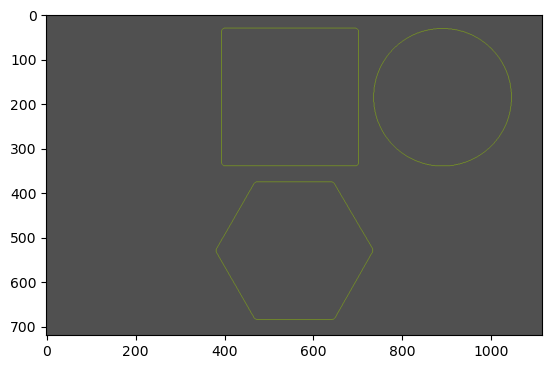

In [21]:
plt.imshow(cv.drawContours(canvas, top_3_cnts_by_area, -1, (150, 200, 0)))

- ### Contour Perimeter

> The function `cv.arcLength(cnt, closed)`

Contour perimeter is also called arc length. It can be found out using cv.arcLength() function. Second argument specify whether shape is a closed contour (if passed True), or just a curve. 

In [22]:
cv.arcLength(shape_img_contours[0], True)

39.071067690849304